## Computer Vision Linear Filter

Write a function that implements a 3x3 linear filter on a grey-scale image of NxM pixels.  The function should take the following as inputs.

The filter 3x3 filter mask as a 3x3 integer array
Input image
A parameter specifying how the edge pixels should be treated (O- omit edge pixels, S- shrink filter at edges, P-pad the image with black white coloured pixels, R-replicate edge rows and W-wrap the image
The function should output the image as a result.

 You may use Python, c# or Java native (i.e. without using any libraries) code.

Since this code will be checked using an automated tool, you must name your source file in the following format

<indexNumber>_<Proigraming language code>_Q2.<file extension>

Use P,C,J respectively as the programing language code for Python, C# and Java.



#### Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#### Open a rgb Image

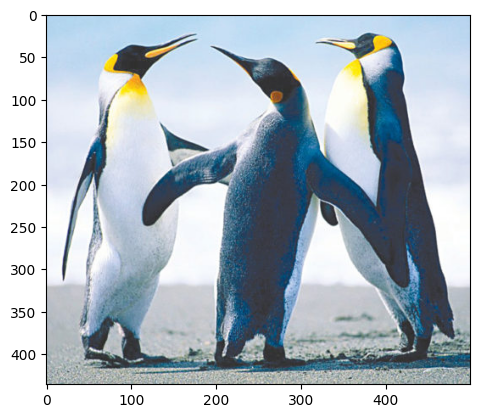

In [35]:
img = mpimg.imread('original.jpg')     
plt.imshow(img)
plt.show()

#### Convert to Gray

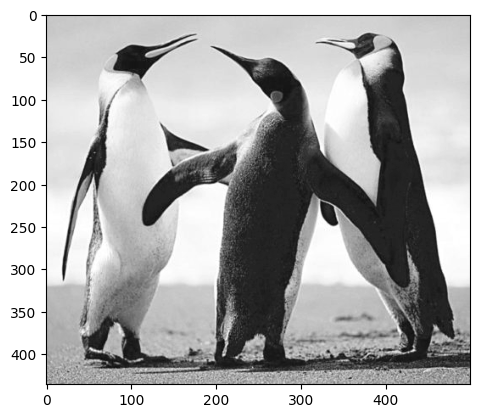

In [36]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

##### Define Mask for Linear Filter

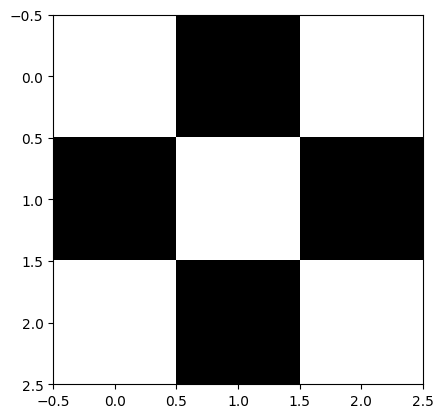

In [37]:

identityMask = np.zeros((3,3),np.float32)
identityMask[1][1] = 1
sharpMask = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
randomMask = np.array([[1,0,1], [0,1,0], [1,0,1]])
boxblurMask = np.ones((3,3),np.float32)/9
plt.imshow(randomMask, cmap=plt.get_cmap('gray'))
# print(identityMask)


#### Function for Linear filter 
3x3 linear filter on a grey-scale image of NxM pixels.  


In [38]:
def filtering(img, mask, image_h, image_w, h ,w):
    filteredImage = np.zeros(img.shape)
    for i in range(h, image_h - h): ## traverse image row
        for j in range(w, image_w - w):  ## traverse image col 

            overlapImg = img[i-h : i+h+1, j-h : j+h+1 ]    # Crop image for mask product 
            filteredImage[i][j] = np.sum(overlapImg * mask)  # Filtering

    return filteredImage

def shrinkFilter(image: np.ndarray, mask: np.ndarray):

    img_h, img_w = image.shape[0], image.shape[1]  # get image height and width
    mask_h, _ = mask.shape  # Get mask height

    shaped_mask = mask
    overlaped_image = np.zeros(mask.shape)

    filteredImage = np.zeros(image.shape)

    for row_index in range(img_h):

        if row_index == 0:
            cut_row_mask = np.vsplit(mask, np.array([mask_h//2, mask_h//2]))[-1]
            overlaped_row_image = image[row_index:row_index + cut_row_mask.shape[0], :]

        elif row_index == (img_h-1):
            cut_row_mask = np.vsplit(mask, np.array([(mask_h//2)+1, (mask_h//2)+1]))[0]
            overlaped_row_image = image[row_index - cut_row_mask.shape[0] + 1:img_h, :]

        else:
            cut_row_mask = mask[(mask.shape[0]//2) - row_index if ((mask.shape[0]//2) - row_index) >= 0 else 0: mask.shape[1] if (
                img_h-1-row_index) >= (mask.shape[0]//2) else (mask.shape[0]-(mask.shape[0]//2) + img_h-1-row_index), :]
            overlaped_row_image = image[row_index - (mask_h//2) if (row_index - (mask_h//2)) >= 0 else 0:
                                        row_index + (mask_h//2) + 1 if (row_index + (mask_h//2)) <= img_h - 1 else img_h, :]

        for column_index in range(img_w):

            _, shaped_mask_w = cut_row_mask.shape

            if column_index == 0:
                shaped_mask = np.hsplit(cut_row_mask, np.array([shaped_mask_w//2, shaped_mask_w//2]))[-1]
                overlaped_image = overlaped_row_image[:, column_index:column_index+shaped_mask.shape[1]]

            elif column_index == (img_w-1):
                shaped_mask = np.hsplit(cut_row_mask, np.array([(shaped_mask_w//2)+1, (shaped_mask_w//2)+1]))[0]
                overlaped_image = overlaped_row_image[:, column_index-(shaped_mask.shape[1]) + 1:img_w]

            else:
                shaped_mask = cut_row_mask[:, (cut_row_mask.shape[1]//2) - column_index if ((cut_row_mask.shape[1]//2) - column_index) >= 0 else 0: cut_row_mask.shape[1] if (
                    img_w-1-column_index) >= (cut_row_mask.shape[1]//2) else (cut_row_mask.shape[1]-(cut_row_mask.shape[1]//2) + img_w-1-column_index)]
                overlaped_image = overlaped_row_image[:, column_index - (shaped_mask.shape[1]//2) if (column_index - (shaped_mask.shape[1]//2)) >= 0 else 0: column_index + (
                    shaped_mask.shape[1]//2) + 1 if (column_index + (shaped_mask.shape[1]//2)) <= img_w - 1 else img_w]

            if overlaped_image.ndim == 2:
                filteredImage[row_index][column_index] = np.sum(shaped_mask * overlaped_image)
            else:
                filteredImage[row_index][column_index] = np.sum(shaped_mask.reshape((shaped_mask.shape[0], shaped_mask.shape[1], 1)) * overlaped_image)
    return filteredImage



##### Main Function Linear filter

The filter 3x3 filter mask as a 3x3 integer array
Input image 
@Param O- omit edge pixels, 
@Param S- shrink filter at edges, 
@Param P-pad the image with black white coloured pixels, 
@Param R-replicate edge rows and 
@Param W-wrap the image

In [39]:
def linearFilter(mask, img, handling = "O"):
    image_h, image_w = img.shape[0], img.shape[1] # Get image height and width
    mask_h, mask_w = mask.shape[0], mask.shape[1] # Get mask height and width

    h = mask_h//2  
    w = mask_w//2

    if handling == "O":  ## Omit Edges
        return filtering(img, mask, image_h, image_w, h, w)
    
    if handling == "W": ## wrap the image
        # Fetch First and Last Rows
        fetchFirstRow = img[0]
        fetchLastRow = img[-1]
        
        imgWrapped = img.copy()
        imgWrapped = np.insert(imgWrapped, 0, fetchLastRow, axis=0)
        imgWrapped = np.append(imgWrapped, [fetchFirstRow], axis = 0)
       
        # # Fetch First and Last Cols
        fetchFirstCol = imgWrapped[:,0:1]
        fetchLastCol = imgWrapped[:,-1]
        
        imgWrapped = np.insert(imgWrapped, 0, fetchLastCol, axis=1)
        imgWrapped = np.append(imgWrapped, fetchFirstCol, axis = 1)

        return filtering(imgWrapped, mask, image_h, image_w, h, w)

    if handling == "P": ## Pad the image

        verticalBorder = np.zeros((image_h,3),np.int8)   ## Add white vertical border
        padImg = img.copy()

        padImg = np.insert(padImg, 0, verticalBorder, axis=1)
        ## Due to dimension error fetch from image
        fetchFirstCol = padImg[:,0:1]
        padImg = np.append(padImg, fetchFirstCol, axis = 1)

        horizontalBorder = np.zeros((padImg.shape[1], 3), np.int8)  ## Add horizontal Border
        padImg = np.insert(padImg, 0, horizontalBorder, axis=0)
        padImg = np.append(padImg, [horizontalBorder], axis = 0)

        return filtering(padImg, mask, image_h, image_w, h, w)

    if handling == "R":
           # Fetch First and Last Rows
        fetchFirstRow = img[0]
        fetchLastRow = img[-1]
        
        imgReplicated = img.copy()
        imgReplicated = np.insert(imgReplicated, 0, fetchFirstRow, axis=0)
        imgReplicated = np.append(imgReplicated, [fetchLastRow], axis = 0)
       
        # # Fetch First and Last Cols
        fetchFirstCol = imgReplicated[:,0]
        fetchLastCol = imgReplicated[:,-1:]
        
        imgReplicated = np.insert(imgReplicated, 0, fetchFirstCol, axis=1)
        imgReplicated = np.append(imgReplicated, fetchLastCol, axis = 1)

        return filtering(imgReplicated, mask, image_h, image_w, h, w)
        
    if handling == "S":
        return shrinkFilter(img, mask)
    return None

#### Apply Filter

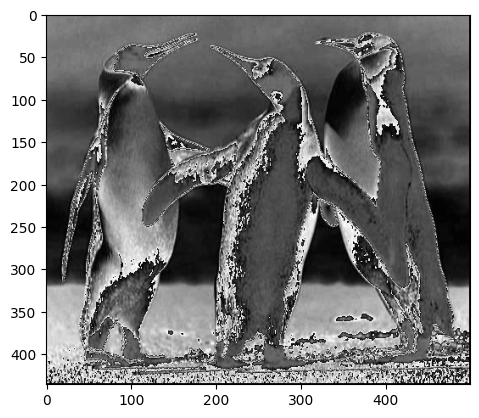

In [42]:
filteredImg = linearFilter(identityMask,img, "O")
plt.imshow((filteredImg * 255).astype(np.uint8) ,cmap="gray")